# Building a Classifier from a Dataset to Predict the Absence or Presence of Heart Disease

## Introduction:

### Background Information:
Cardiovascular diseases remain the leading cause of death globally. Cardiovascular diseases encompass many different heart conditions which are characterized by several different variables. Therefore, it becomes difficult to characterize an individual with specific conditions as having heart disease. Because of this, data sets and corresponding algorithms are essential tools for physicians, researchers, and other healthcare workers when characterizing or diagnosing a condition such as heart disease.

### Research Question:
We attempt to answer the following question using a data set from Cleveland, Ohio regarding heart disease statistics: Considering a patient’s age and maximum heart rate achieved will the heart disease diagnosis be classified as absent (FALSE) or present (TRUE)?

### Data set description:
The data set is from the 1980s and describes 14 different variables for patients who may have heart disease. 14 variables in the dataset consisted of: age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiograph results, maximum heart rate achieved, excersize induced angina, ST depression induced by exercise vs. rest, slope of peak exercise ST segment, number of major vessels, thal and diagnosis of heart disease. For our project proposal, we previously utilized the patient's age, resting blood pressure, and serum cholesterol levels, hoping to ultimately create a classification which could aid us in answering the question previously posed. Upon futher analysis, we decided to change our predictors to two variables: Maximum Heart Rate Achieved and Age as they seem to work better together in describing the present or absence of heart disease (futher explanation offered below). We consider these variables as the most crucial and persuasive when wanting to determine the presence or absence of heart disease in a patient.

## Methods & Results:
We used age and maximum heart rate achieved as variables and compared both these factors against the heart disease diagnosis, in order to determine whether or not they have an impact on heart disease diagnosis.

The steps we used to complete our project include: 
1. Split the dataset into testing and training data.
2. Determine which k to use; test different k values - plot the k vs. accuracy.
3. With the best value of k (nearest neighbour, recipe), make a model with the training set.
4. Make a prediction based on the model.
5. Test the model on the testing data and calculate accuracy.
6. Visualize our model.

First, we need to attach all the packages necessary for analysis.

In [1]:
library(tidyverse)
library(repr)
library(scales)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() mask

Here, the dataset is loaded using its URL and the columns are renamed appropriately to make them easier to identify and work with later.

In [2]:
URL <- ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

loaded_data <- read_csv(URL) 
    colnames(loaded_data) <- c("Age", "Sex","Chest_Pain_Type","Resting_Blood_Pressure","Serum_Cholestrol","Fasting_Blood_Sugar", "Resting_Electrocadriographic_Results", "Maximum_Heart_Rate_Achieved","Excercise_Induced_Angina", "ST_Depression_Induced","Slope_of_Peak_Exercise_ST_Segment", "#_of_Major_Vessels", "Defects", "Diagnosis_of_Heart_Disease")

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rather than the 0-4 scale used in the original dataset to indicate the resulting severity of heart disease, we change it to a binary result system where 0 indicates the absence (FALSE) of heart disease and 1-4 indicates its presence (TRUE). Doing this allows for a classification model, rather than a regression model.

In [3]:
mutated_cleveland_heart <- loaded_data |>
    mutate(Diagnosis = Diagnosis_of_Heart_Disease != 0)
head(mutated_cleveland_heart)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocadriographic_Results,Maximum_Heart_Rate_Achieved,Excercise_Induced_Angina,ST_Depression_Induced,Slope_of_Peak_Exercise_ST_Segment,#_of_Major_Vessels,Defects,Diagnosis_of_Heart_Disease,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,TRUE


<em>Figure 1: This shows a clean version of the whole dataset.</em>

To determine the most influential predictor variables, we analyzed the relationship of all potential predictor variables against the outcome variable, Diagnosis of Heart Disease use the ggpairs() function.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

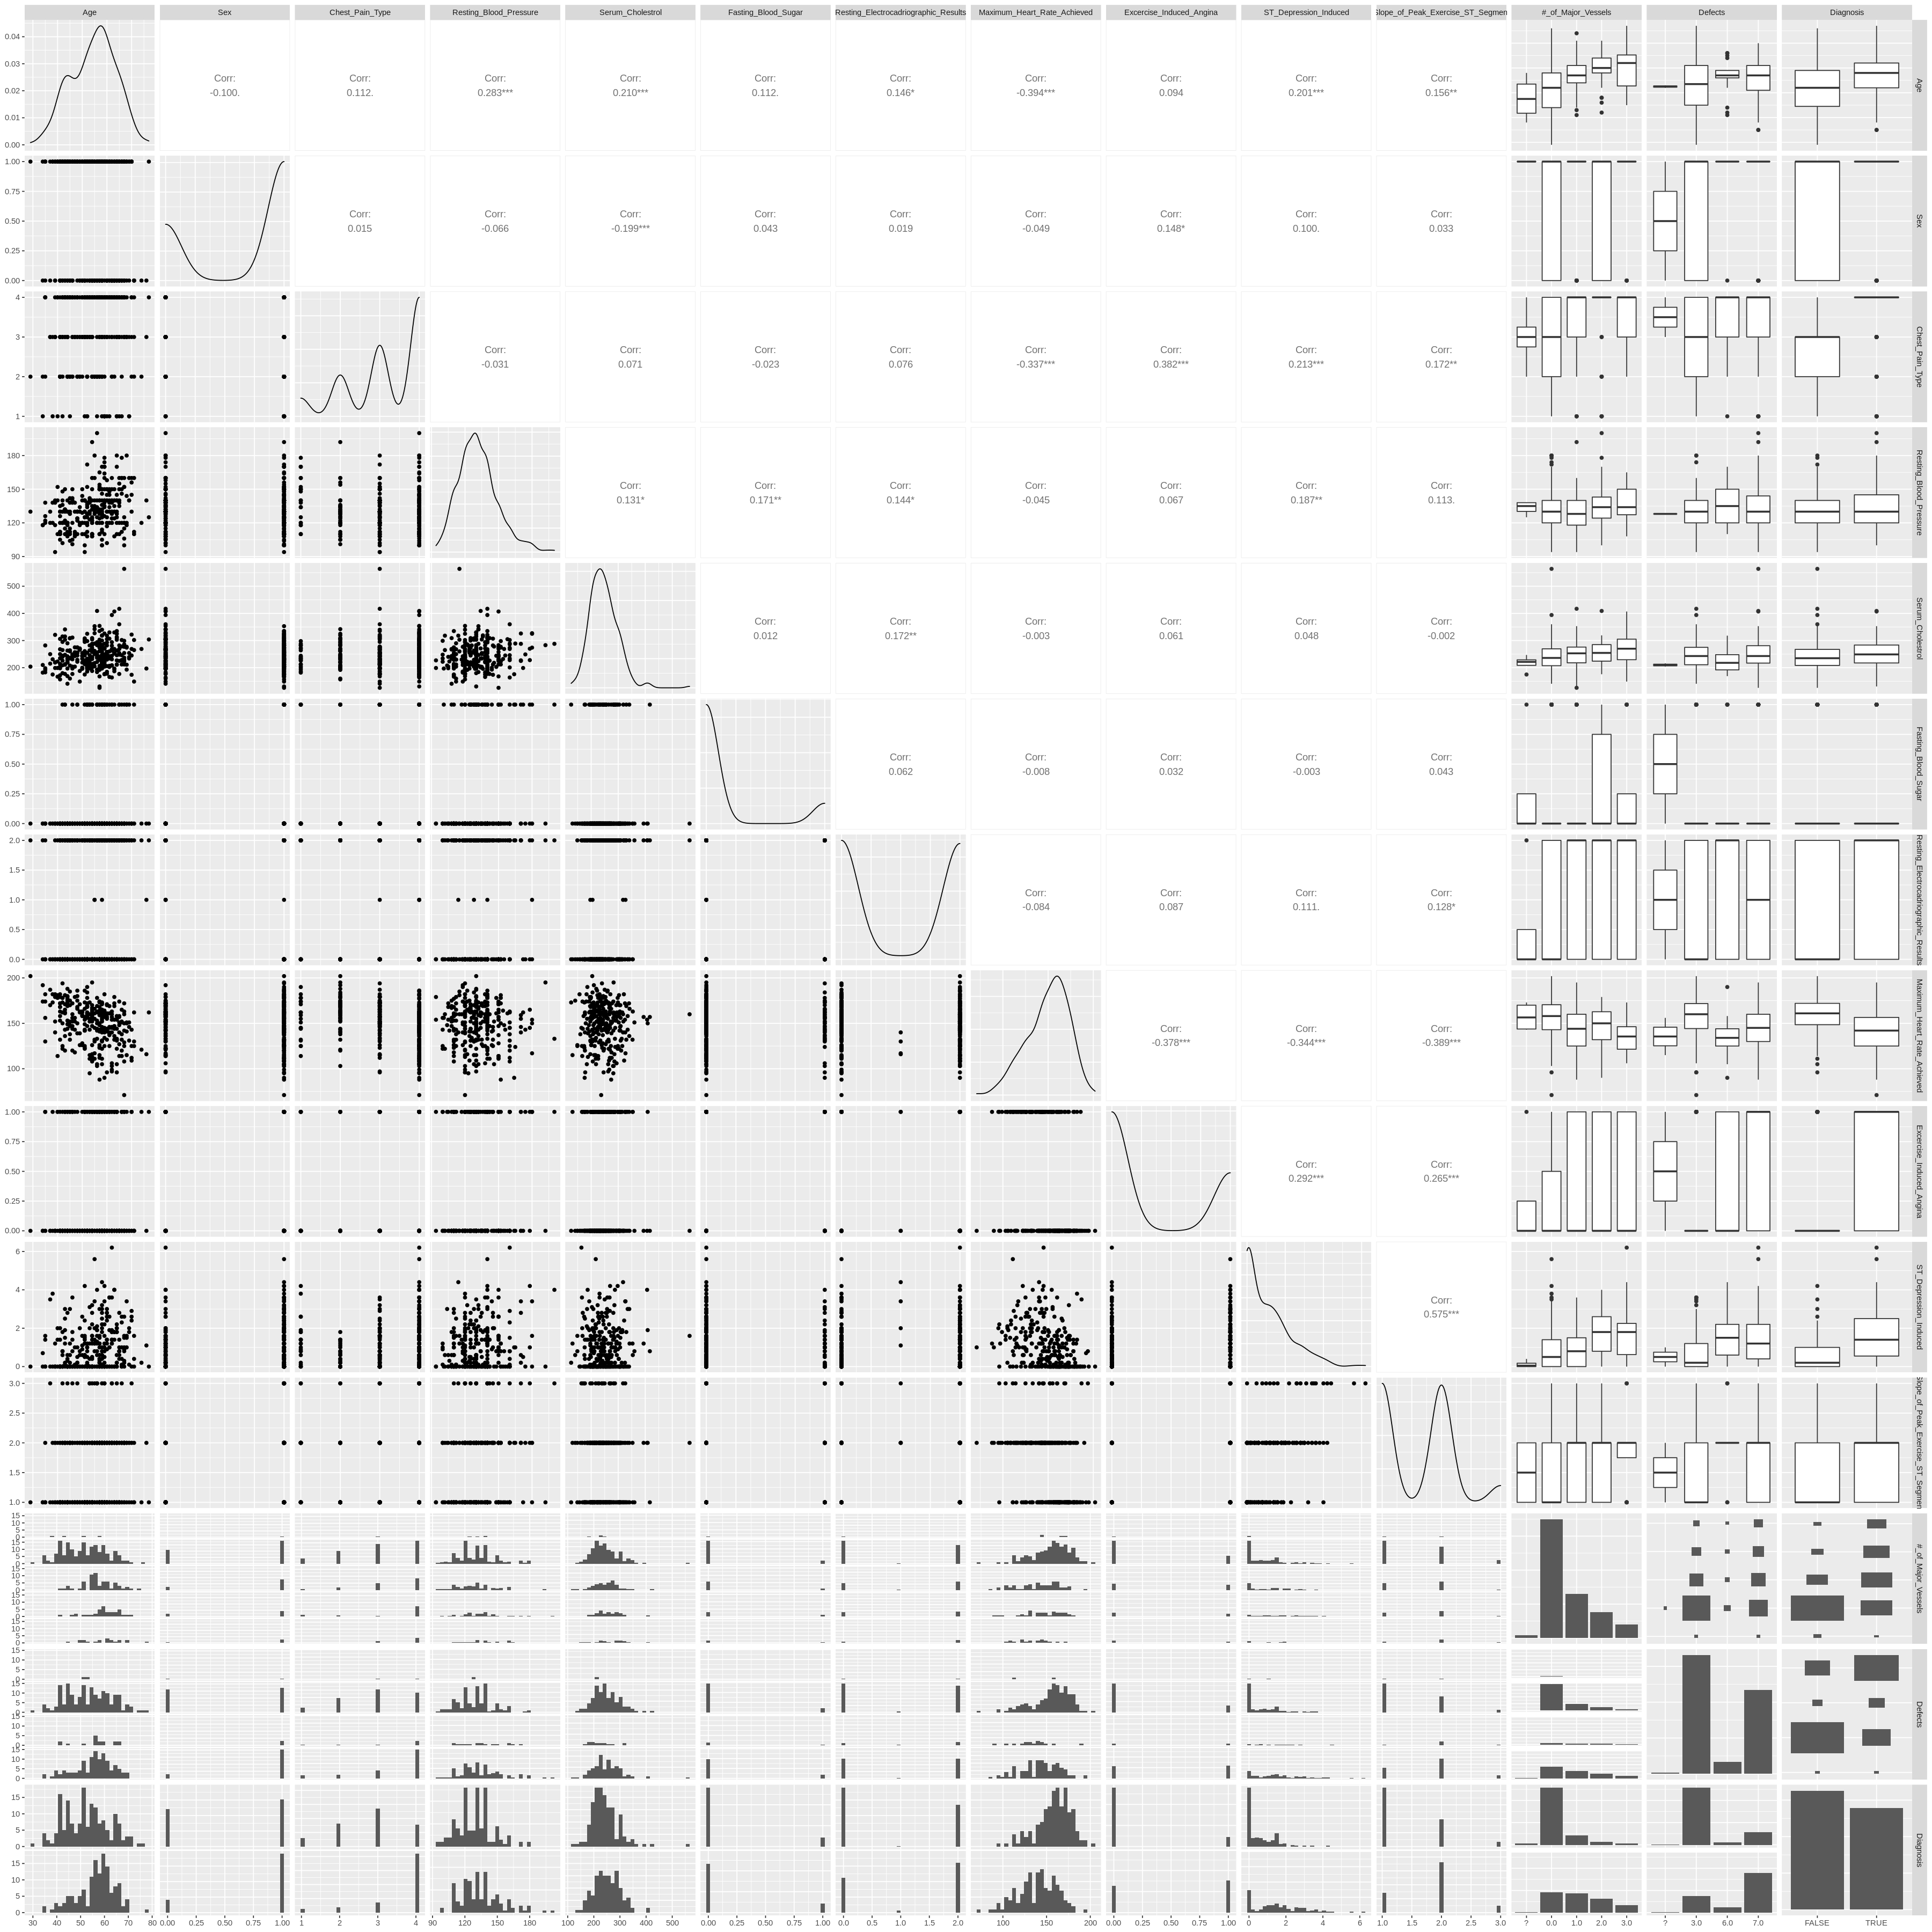

In [4]:
options(repr.plot.height = 30, repr.plot.width = 30)
variable_relationship <- mutated_cleveland_heart |>
    select(-Diagnosis_of_Heart_Disease) |>
    ggpairs()

variable_relationship

<em>Figure 2: Focusing on the bottom row, we can see histograms distributions of each predictor variable. It’s observed that age (column 1), resting blood pressure (column 4), serum cholesterol (column 5), and maximum heart rate achieved (column 8) are the predictors that have the strongest relationship with diagnosis, as suggested by their wider histogram distribution. The next step is to narrow down these possible predictors to the 2 strongest predictors, which is done below.</em>

We cleaned the data by selecting the variables we needed and changed “Diagnosis” to a factor instead of logic.

In [6]:
cleveland_heart_cleaned <- mutated_cleveland_heart |>
    select(Age, Maximum_Heart_Rate_Achieved, Diagnosis)|>
    mutate("Diagnosis" = as_factor(Diagnosis))

We took the mean of both the maximum heart rate achieved and age columns and grouped it by the diagnosis (TRUE or FALSE). Displaying this table showed us the differences in age and heart rate that correspond with a heart disease diagnosis.

In [17]:
training_heart_mean <- cleveland_heart_cleaned |>
    group_by(Diagnosis) |>
    summarize(Maximum_Heart_Rate_Achieved = mean(Maximum_Heart_Rate_Achieved),
             Age = mean(Age))
head(training_heart_mean)

Diagnosis,Maximum_Heart_Rate_Achieved,Age
<fct>,<dbl>,<dbl>
FALSE,158.4294,52.52147
TRUE,139.2590,56.62590


<em>Figure 3: Summary of predictor mean values for each diagnosis classification.</em>

By setting the seed as 16, a random but reproducible set of data points were chosen and split into the training and testing data, using 75% for the training, and setting the strata to diagnosis, being the thing we are trying to predict.

In [34]:
# We then split the data set to a training and testing set randomly.
set.seed(16)

heart_split <- initial_split(cleveland_heart_cleaned, prop = 0.75, strata = Diagnosis)
training_heart <- training(heart_split)
testing_heart <- testing(heart_split)

glimpse(training_heart)
glimpse(testing_heart)

Rows: 226
Columns: 3
$ Age                         <dbl> 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48…
$ Maximum_Heart_Rate_Achieved <dbl> 187, 172, 178, 163, 148, 153, 173, 162, 17…
$ Diagnosis                   <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
Rows: 76
Columns: 3
$ Age                         <dbl> 62, 58, 58, 40, 69, 42, 43, 57, 65, 40, 58…
$ Maximum_Heart_Rate_Achieved <dbl> 160, 173, 172, 114, 151, 178, 120, 112, 11…
$ Diagnosis                   <fct> TRUE, TRUE, FALSE, TRUE, FALSE, FALSE, TRU…


In order to visualize the relationship between the predictors and the diagnosis, we created a scatter plot and separated the diagnosis (true or false) by colour. This is done to ensure that the randomly selected training data gave a similar distribution of predictors.
*Note: This is the same scatterplot as above, but with the training data only.

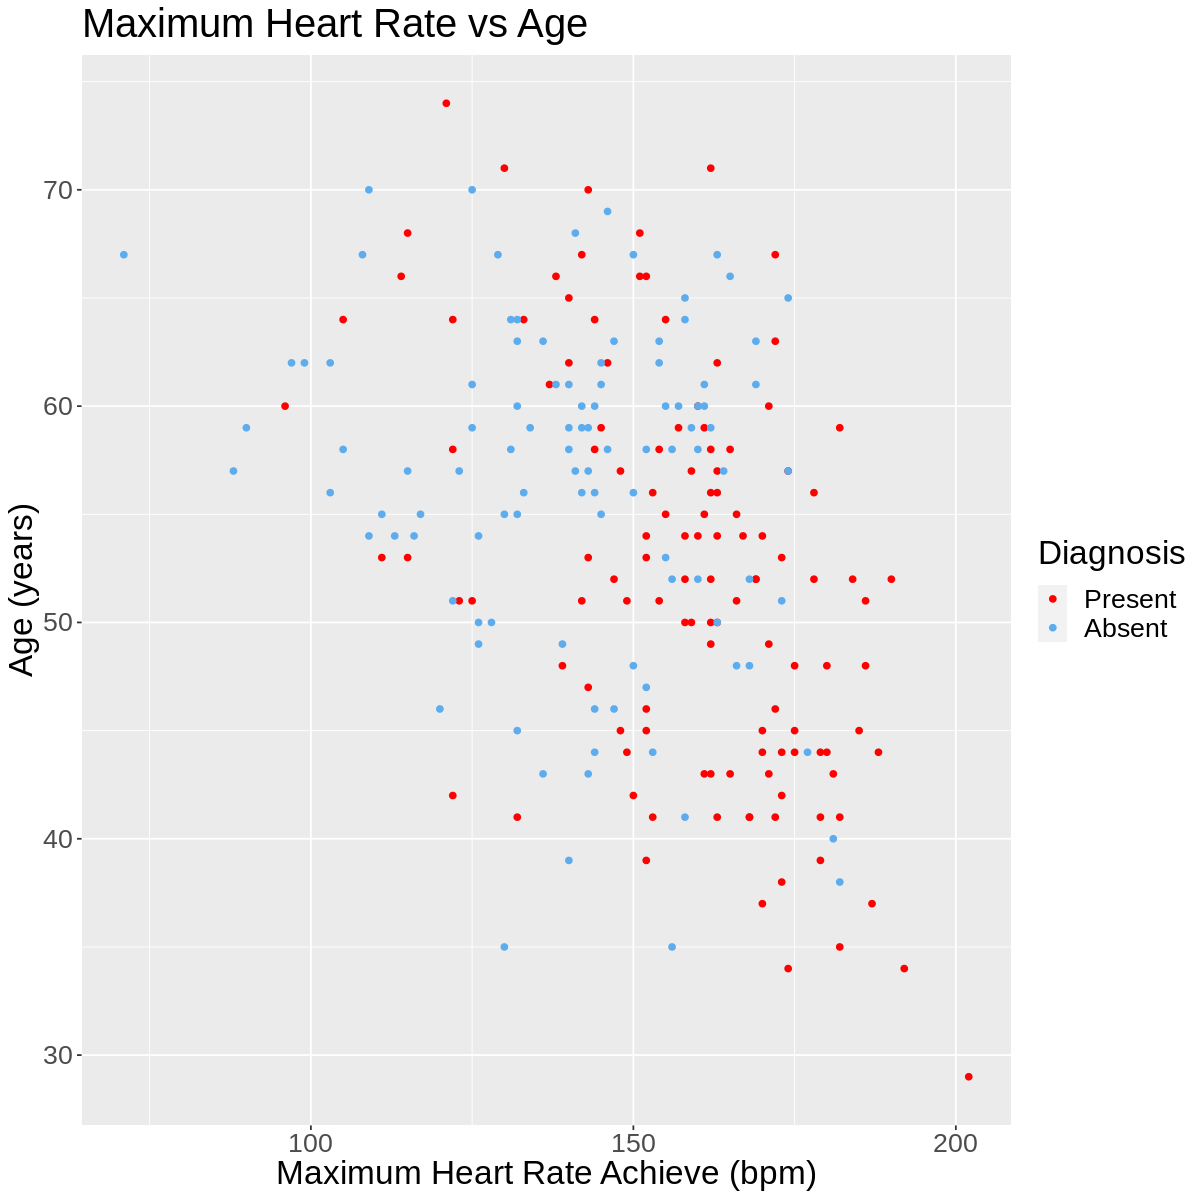

In [35]:
options(repr.plot.height = 10, repr.plot.width = 10)
heart_plot <- training_heart |>
  ggplot(aes(x = Maximum_Heart_Rate_Achieved, y = Age, color = Diagnosis)) +
  geom_point(alpha = 1) +
  labs(x = "Maximum Heart Rate Achieve (bpm)" , y= "Age (years)", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("red", "steelblue2")) + 
    theme(text = element_text(size = 20)) +
    ggtitle("Maximum Heart Rate vs Age")

heart_plot

<em>Figure 4: This figure shows that most points with heart disease present has higher maximum heart rate and lower age, whereas most points with heart disease absent has lower maximum heart rate and higher age. Many points do not fit this trend directly, which may influence our model accuracy later.</em>

Next, we wanted to ensure that the training data set had similar proportions in each of the classes (FALSE and TRUE).

In [36]:
training_set_proportions <- training_heart |>
                      group_by(Diagnosis) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(training_heart))
training_set_proportions

Diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,122,53.9823
TRUE,104,46.0177


<em>Figure 5: Showing the distribution of the absence (FALSE) or presence (TRUE) of heart disease.</em>

Here, we created the recipe and the model for our dataset. We made sure to scale and center all of our data to ensure reliability in our results. We also set neighbors equal to tune in order to determine the optimum number of k neighbors. We then performed a cross validation in order to get a higher value for the accuracy of our model. With all of this prepared, we plotted the accuracy vs the number of neighbors to see how many k nearest neighbors would be the best for our model.

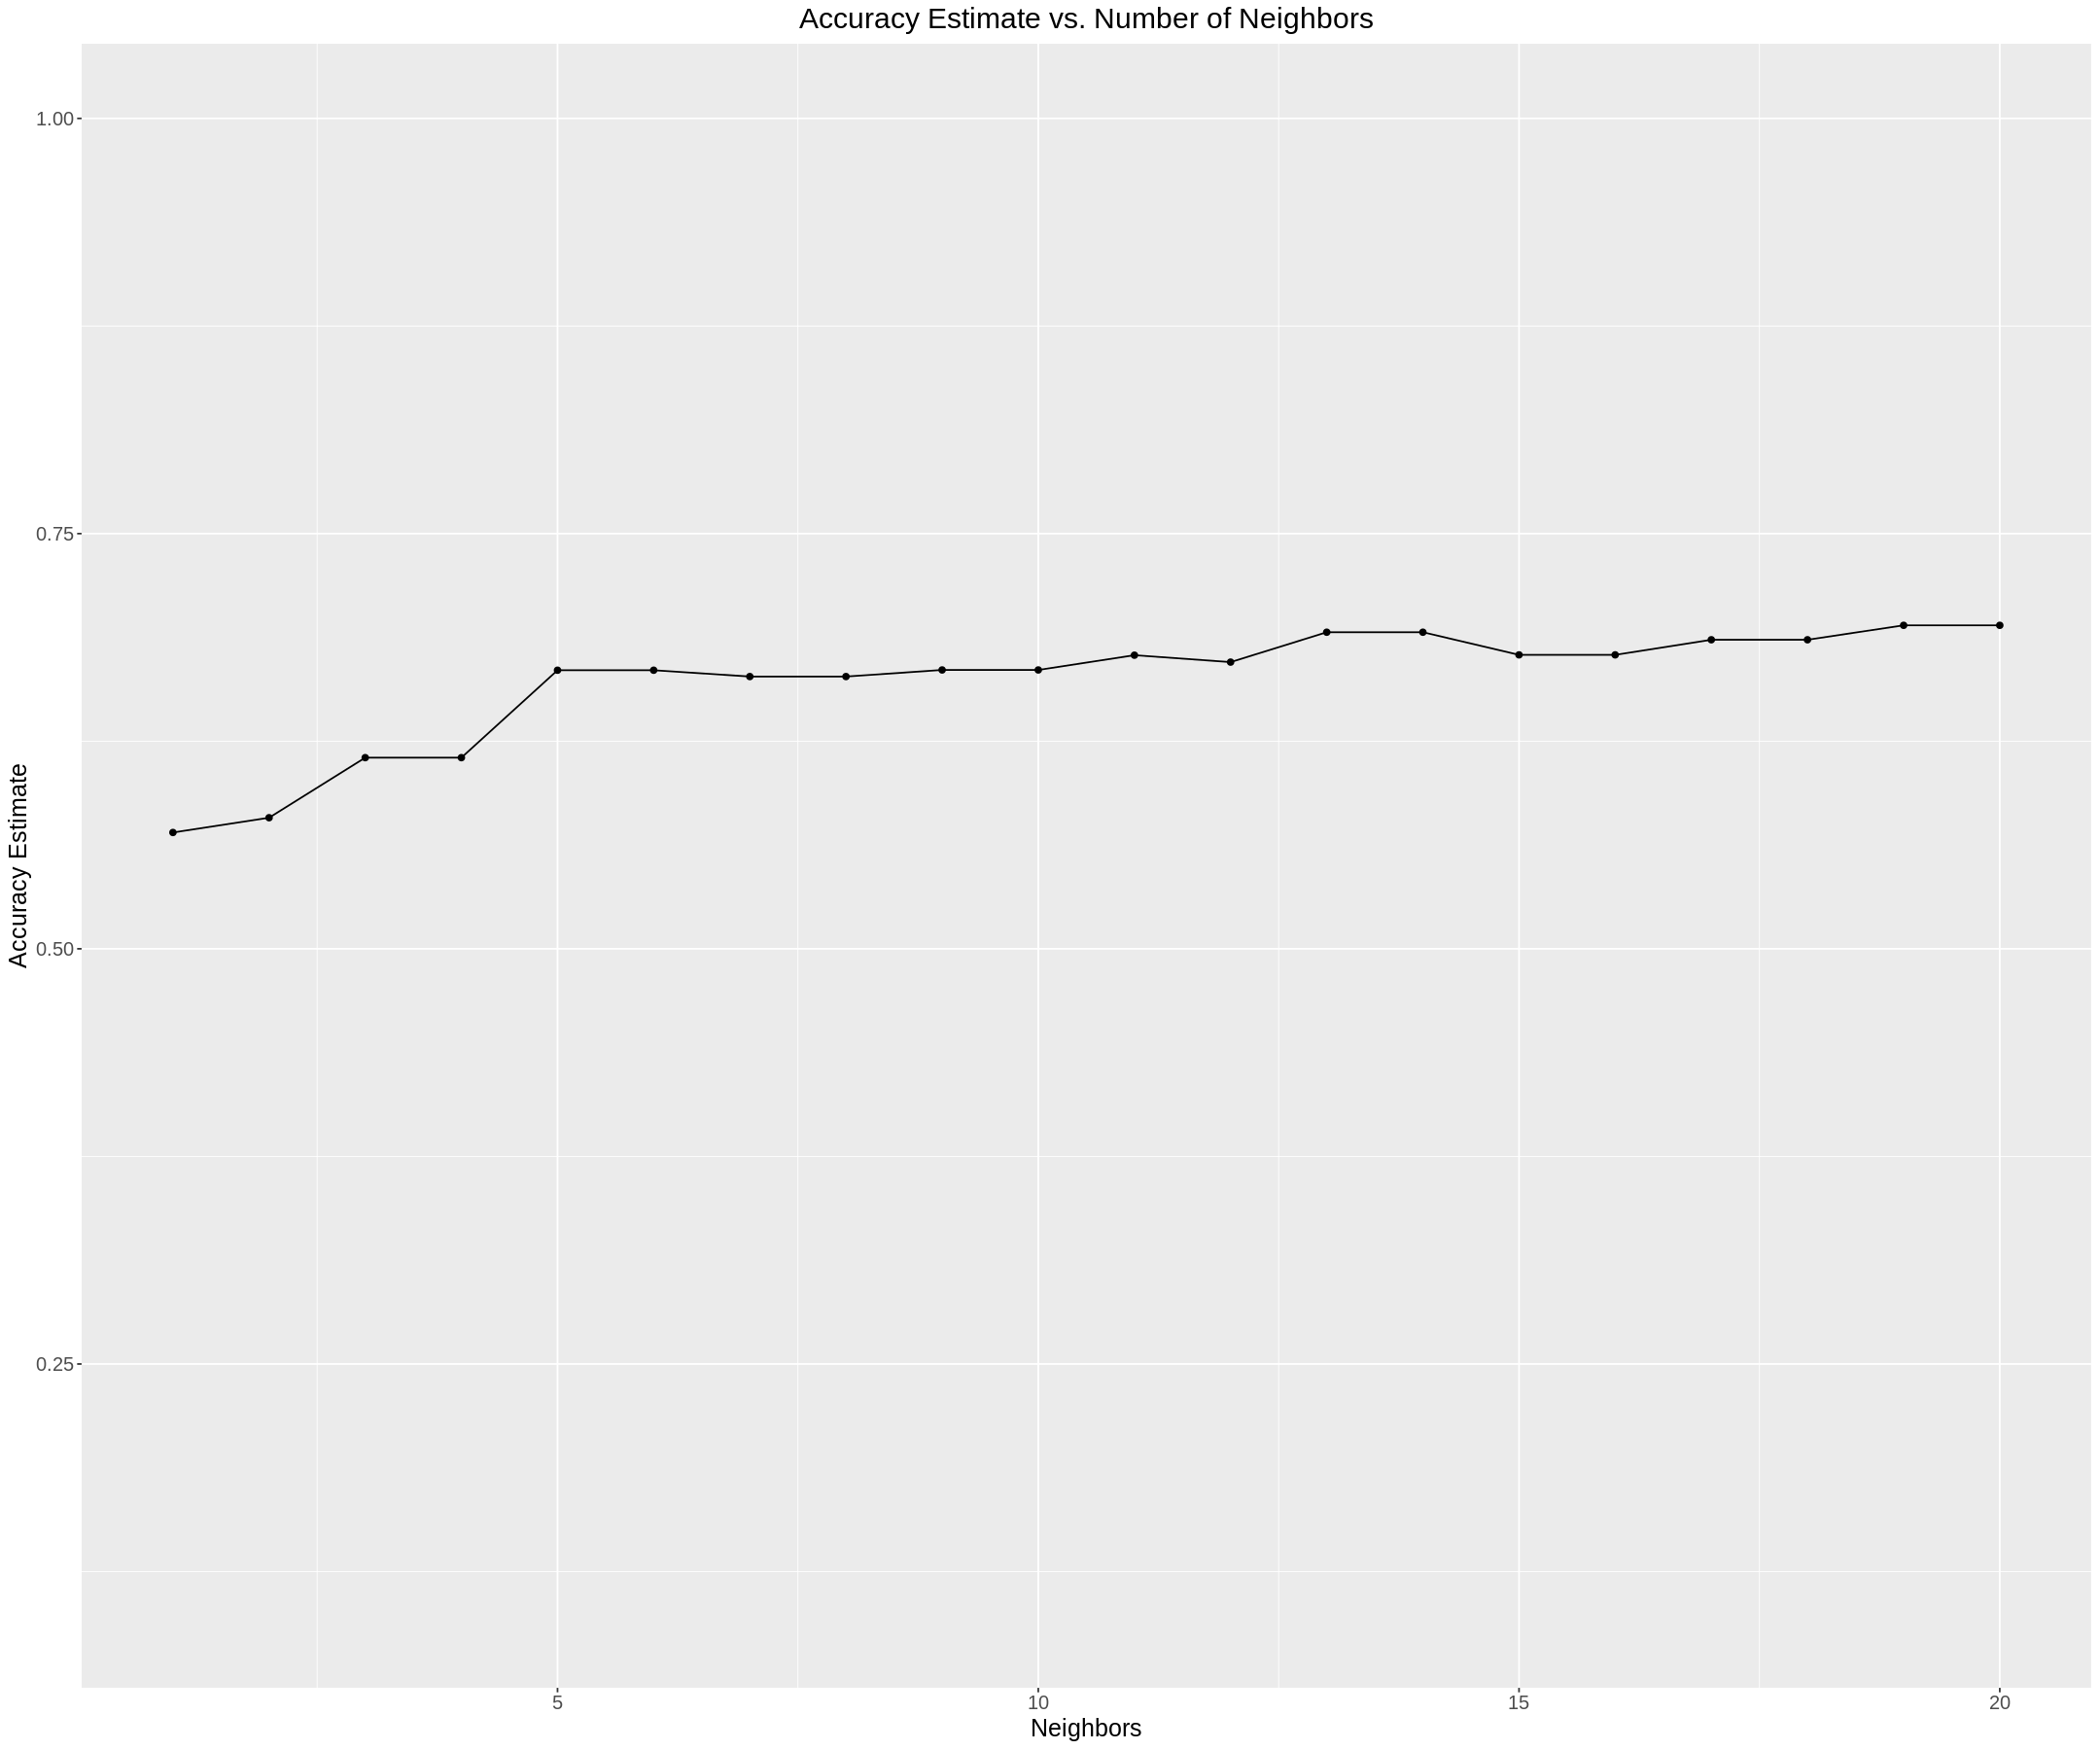

In [40]:
set.seed(16)

# Recipe made with our two predictor variables specified.
heart_recipe <- recipe(Diagnosis ~ ., data = cleveland_heart_cleaned) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

# KNN model specification made.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# 10-fold cross validation of training data.
values_vfold <- vfold_cv(training_heart, v = 10, strata = Diagnosis)

# Tibble of k neighbors from 1 to 20, increasing by 1.
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

# Workflow made.
knn_fit <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = values_vfold, grid = k_vals) |>
            collect_metrics()

accuracies <- knn_fit |>
    filter(.metric == "accuracy")

# Plot of k-values with different accuracies.
options(repr.plot.height = 15, repr.plot.width = 18)

neighbours_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Accuracy Estimate vs. Number of Neighbors") +
    scale_x_continuous(breaks = seq(0, 150, by = 5)) + 
    scale_y_continuous(limits = c(0.1, 1.0)) + 
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15))
    
neighbours_plot

<em>Figure 6: Accuracies of different k values.</em>

To make sure our choice for the number of k values was the optimal one, we arranged the number of neighbors in order of descending accuracy, so that the k value of the highest accuracy would be at the top of the data table. Then, by slicing and printing the first row, it was determined that the best number of k neighbors is 19. 

In [43]:
# Used to get the most accurate k value
best_k <- accuracies |> 
    arrange(desc(mean)) |>
    slice(1) |>
    select(neighbors) |> 
    pull()
best_k

# New KNN specification made with the optimum k value.
knn_spec_best <- nearest_neighbor(weight_func = 'rectangular', neighbors = best_k) |>
    set_engine('kknn') |>
    set_mode('classification')

# New model refitted with training data.
model_fit_max <- workflow() |> 
    add_recipe(heart_recipe) |>
    add_model(knn_spec_best) |>
    fit(data = training_heart)

[1] 19

We now used our model on the testing set and created a new column in the data for the true values. We then used the metrics function to test the accuracy which revealed a 76% accuracy for the model we created. We also printed the confusion matrix to visualize exactly which values the model got correct and incorrect.

In [45]:
# Testing the accuracy of the model on testing data.
model_predictions_test <- predict(model_fit_max, testing_heart) |>
    bind_cols(testing_heart) 
head(model_predictions_test)

heart_metrics_test <- model_predictions_test |>
    metrics(truth = Diagnosis, estimate = .pred_class) |> 
    filter(.metric == 'accuracy')
heart_metrics_test

# Visualizing the confusion matrix comparing the predicted classes to the true classes.
heart_conf_mat <- model_predictions_test |>
    conf_mat(truth = Diagnosis, estimate = .pred_class)
heart_conf_mat

.pred_class,Age,Maximum_Heart_Rate_Achieved,Diagnosis
<fct>,<dbl>,<dbl>,<fct>
TRUE,62,160,TRUE
FALSE,58,173,TRUE
FALSE,58,172,FALSE
TRUE,40,114,TRUE
FALSE,69,151,FALSE
FALSE,42,178,FALSE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7631579


          Truth
Prediction FALSE TRUE
     FALSE    30    7
     TRUE     11   28

<em>Figure 7: The accuracy of the model is seen to be 76% when comparing the predicted classes to the true classes.</em>

The code below was used to show what a data point will be classified as by the model depending on where it is on the plot. We first set up the scatter plot with our predictors, age and max heart rate. We then coloured the graph based on if there was a presence of heart disease based on our model.

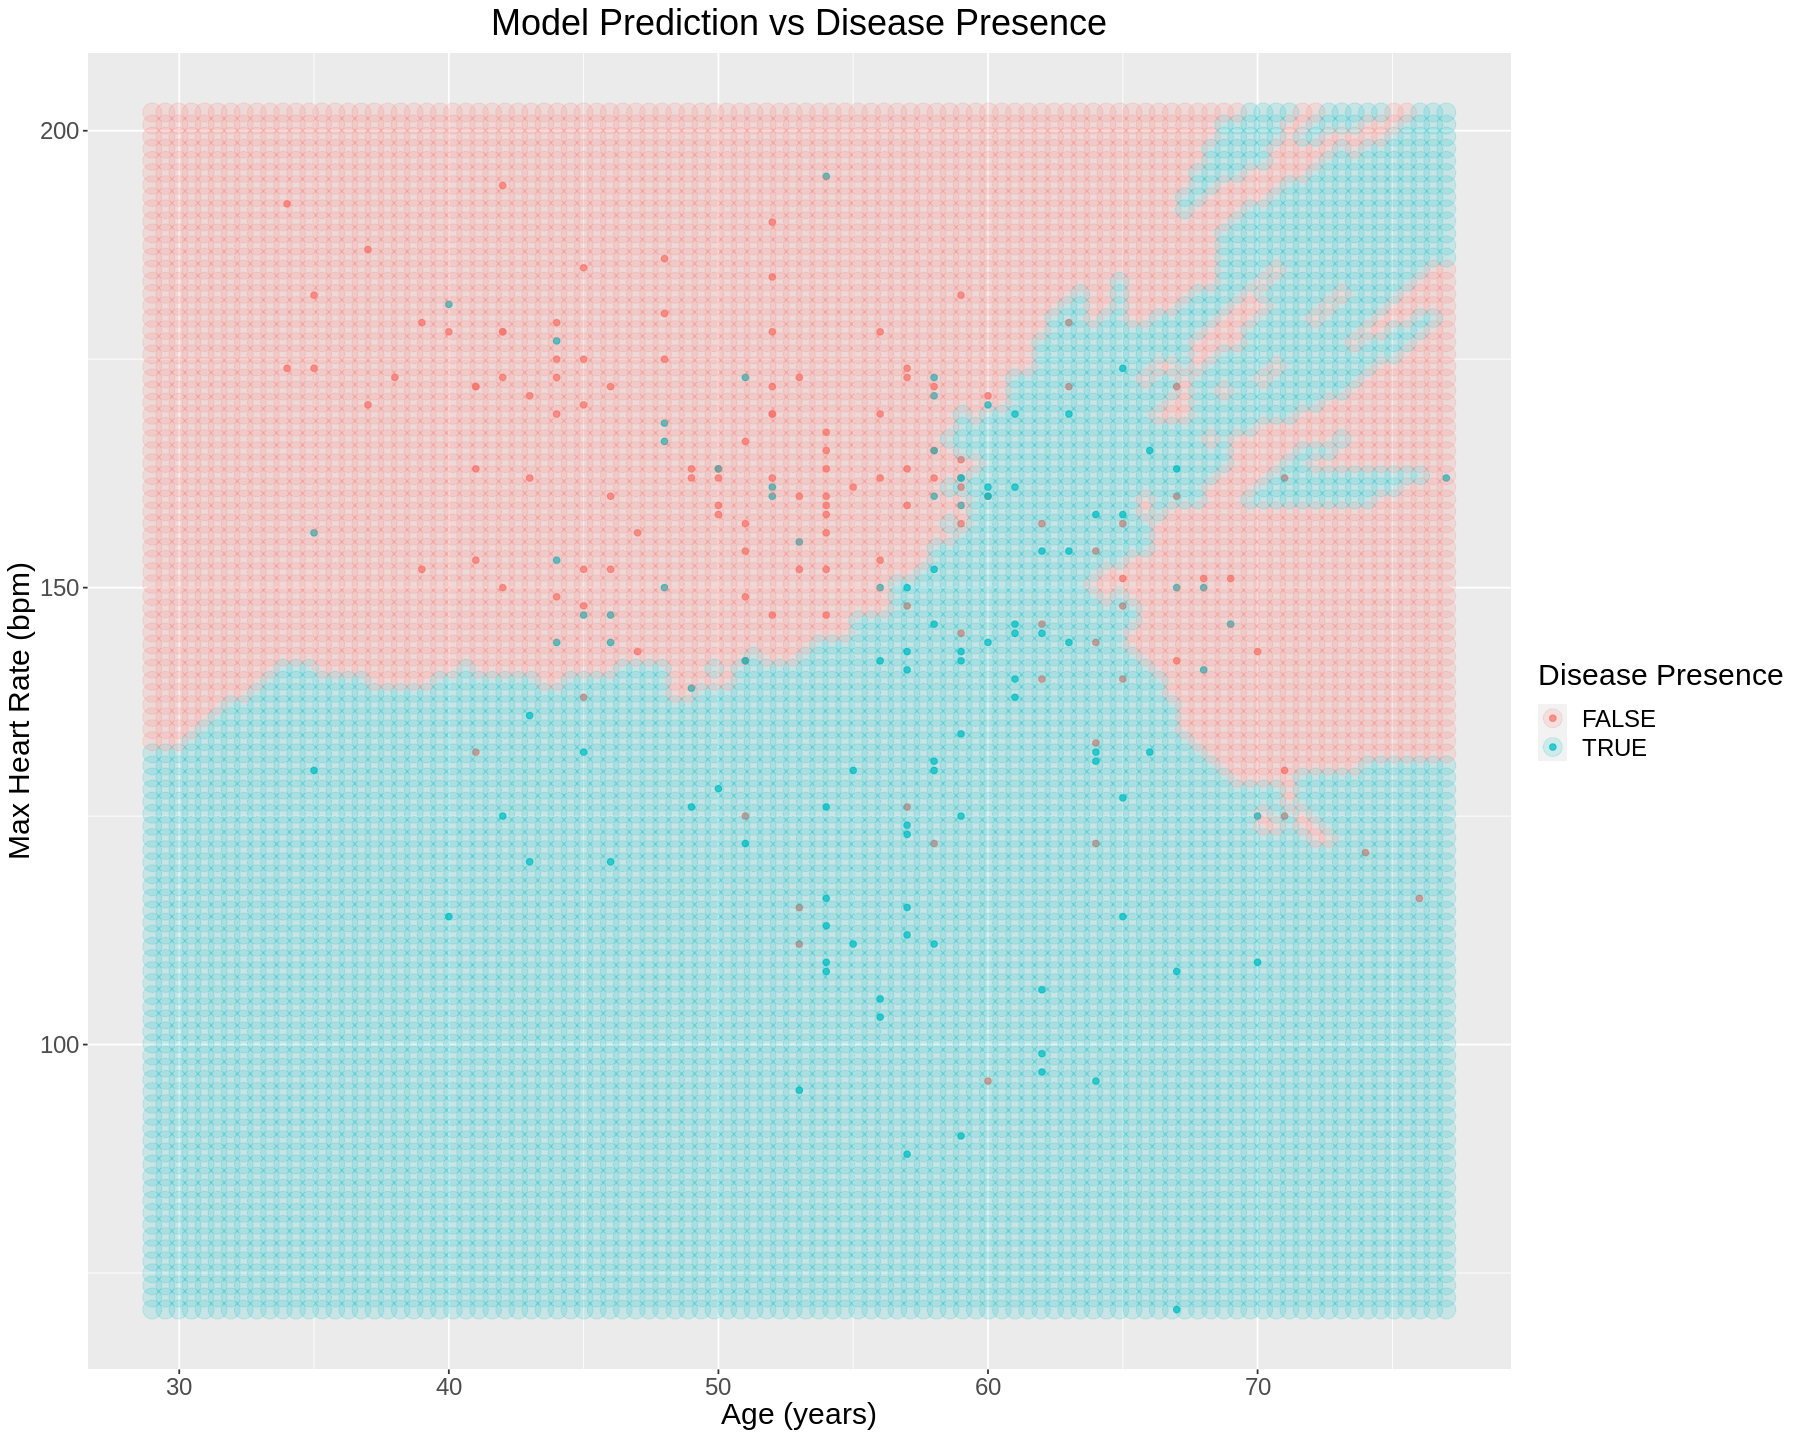

In [15]:
are_grid <- seq(min(cleveland_heart_cleaned $Age), 
                max(cleveland_heart_cleaned $Age), 
                length.out = 100)
smo_grid <- seq(min(cleveland_heart_cleaned $Maximum_Heart_Rate_Achieved), 
                max(cleveland_heart_cleaned $Maximum_Heart_Rate_Achieved), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(Age = are_grid, 
                                Maximum_Heart_Rate_Achieved = smo_grid))

PredGrid <- predict(model_fit_max, asgrid)

prediction_table <- bind_cols(PredGrid, asgrid) |>
  rename(Class = .pred_class)

options(repr.plot.height = 12, repr.plot.width = 15)

plot_predictor_true <- ggplot() +
    geom_point(data = training_heart, 
    mapping = aes(x = Age, 
                  y = Maximum_Heart_Rate_Achieved,
                  color = Diagnosis),
                   alpha = 0.75) +
    geom_point(data = prediction_table, mapping = aes(x = Age, y = Maximum_Heart_Rate_Achieved, color = Class), 
                alpha = 0.15, size = 5) +
                labs(color = "Disease Presence", x = "Age (years)", y = "Max Heart Rate (bpm)") +
                theme(text = element_text(size = 16)) +
                ggtitle("Model Prediction vs Disease Presence") +
                
                theme(plot.title = element_text(vjust = 1, hjust = 0.5), text = element_text(size = 18))
plot_predictor_true

<em>Figure 8: This graph shows the classification of data points (diagnosis present or absent) based on where it is on the plot.</em>

## Discussion:
After extensive trial and error, the predictors that provided the strongest correlation with the presence/absence of heart disease were Maximum Heart Rate and Age. Initially, we considered the patient’s age, resting blood pressure, and serum cholesterol levels as the most impactful predictor variables to determine the presence/absence of heart disease. However, after further examinations of potential predictor relationships with the outcome variable, it was determined that age and maximum heart rate as predictor variables resulted in the highest prediction accuracies.

#### Summary of what we found:
After reviewing further research on the topic of heart disease and comparing diagnoses accuracies, it was determined that an individual’s likelihood of presenting with heart disease increases with a higher maximum heart rate and younger age. On the contrary, older individuals with a lower maximum heart rate will likely not have heart disease.

#### Is this what we expected to find?
We expected, based on the research cited below, that higher maximum heart rates and older age would lead to a higher chance of heart disease being present. However, this is not what our classifier found. Instead, our graphed model found that heart disease diagnoses tend to be more common as maximum heart rate increases and less dependent on age. In the graph in figure 10, there is a clear horizontal split, but an absence of a vertical split. This indicates that maximum heart rate is the primary influencing factor rather than age in detecting heart disease in our model. Finally, some of the data points from our data set are misclassified by the model, hence our 76% accuracy; for example, some data points which indicate an absence of heart disease (FALSE), are actually under the blue coloring which means that the model would classify heart disease as present (TRUE). 

These discrepancies could be due to a number of reasons, such as the fact that the dataset only contained ~200 data points. A small data set means that the classifier had a limited number of training data points used to create the model, thereby increasing the chance of unreliable trends. To address this error, an original data set with more observations is preferred, to generate a more accurate classifier and show more reliable trends.


#### What impacts do these findings have?
We previously predicted that these findings could be used to consider the factors that could influence the general public's risk of heart disease. For example, if there is a significant spike in the presence of heart disease after a certain age, then it could be recommended for people near that age to closely monitor their heart health and receive regular checkups. However, after having created and tested our model, we found an accuracy of 76% based on the confusion matrix, which would not be sufficiently high enough to utilize these predictors to diagnose heart disease. For something as dire as heart disease diagnosis, a diagnosis accuracy of ~100% is ideal.

#### What future questions could this lead to?
If a significant correlation appears between a variable and the presence of heart disease, then the next step would be to conduct further research to examine the underlying biological cause of this observed trend. Next steps would be to examine methods to counteract the variables that increase the risk of heart disease, such as an active lifestyle to maintain a lower maximum heart rate.

### References:
- National Center for Chronic Disease Prevention and Health Promotion, Division for Heart Disease and Stroke Prevention. (2023, Feb. 24). Heart Disease. cdc.gov. https://www.cdc.gov/heartdisease/index.htm#:~:text=The%20term%20%E2%80%9Cheart%20disease%E2%80%9D%20refers,%2C%20in%20some%20cases%2C%20medicine
- National Institute of Health, Heart Health and Aging. (2018, June 1). https://www.nia.nih.gov/health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease
- UCI Machine Learning Repository. (Accessed 2023, Feb. 24). Heart Disease Data Set. https://archive.ics.uci.edu/ml/datasets/Heart+Disease
- World Health Organization. (2021, June 11). Cardiovascular diseases (CVDs). World Health Organization. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)